In [1]:
# machine learning process
#1. Data load & check
#2. EDA
#3. Feature Engineering
#4. Modeling & make submission

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

test = pd.read_csv('data/test.csv', parse_dates=['pickup_datetime'])
train = pd.read_csv('data/train.csv', parse_dates=['pickup_datetime', 'dropoff_datetime'])
display(train.head(), test.head())


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [2]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  625134 non-null  object        
 1   vendor_id           625134 non-null  int64         
 2   pickup_datetime     625134 non-null  datetime64[ns]
 3   passenger_count     625134 non-null  int64         
 4   pickup_longitude    625134 non-null  float64       
 5   pickup_latitude     625134 non-null  float64       
 6   dropoff_longitude   625134 non-null  float64       
 7   dropoff_latitude    625134 non-null  float64       
 8   store_and_fwd_flag  625134 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 42.9+ MB


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


In [4]:
test.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000
mean,1.534884,1.661765,-73.973614,40.750927,-73.973458,40.751816
std,0.498782,1.311293,0.073389,0.029848,0.072565,0.035824
min,1.000000,0.000000,-121.933128,37.389587,-121.933327,36.601322
25%,1.000000,1.000000,-73.991852,40.737392,-73.991318,40.736000
50%,2.000000,1.000000,-73.981743,40.754093,-73.979774,40.754543
75%,2.000000,2.000000,-73.967400,40.768394,-73.963013,40.769852
max,2.000000,9.000000,-69.248917,42.814938,-67.496796,48.857597


In [5]:
pd.options.display.float_format = '{:.5f}'.format
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000
mean,1.53495,1.66453,-73.97349,40.75092,-73.97342,40.75180,959.49227
std,0.49878,1.31424,0.07090,0.03288,0.07064,0.03589,5237.43172
min,1.00000,0.00000,-121.93334,34.35970,-121.93330,32.18114,1.00000
25%,1.00000,1.00000,-73.99187,40.73735,-73.99133,40.73588,397.00000
50%,2.00000,1.00000,-73.98174,40.75410,-73.97975,40.75452,662.00000
75%,2.00000,2.00000,-73.96733,40.76836,-73.96301,40.76981,1075.00000
max,2.00000,9.00000,-61.33553,51.88108,-61.33553,43.92103,3526282.00000


<AxesSubplot: >

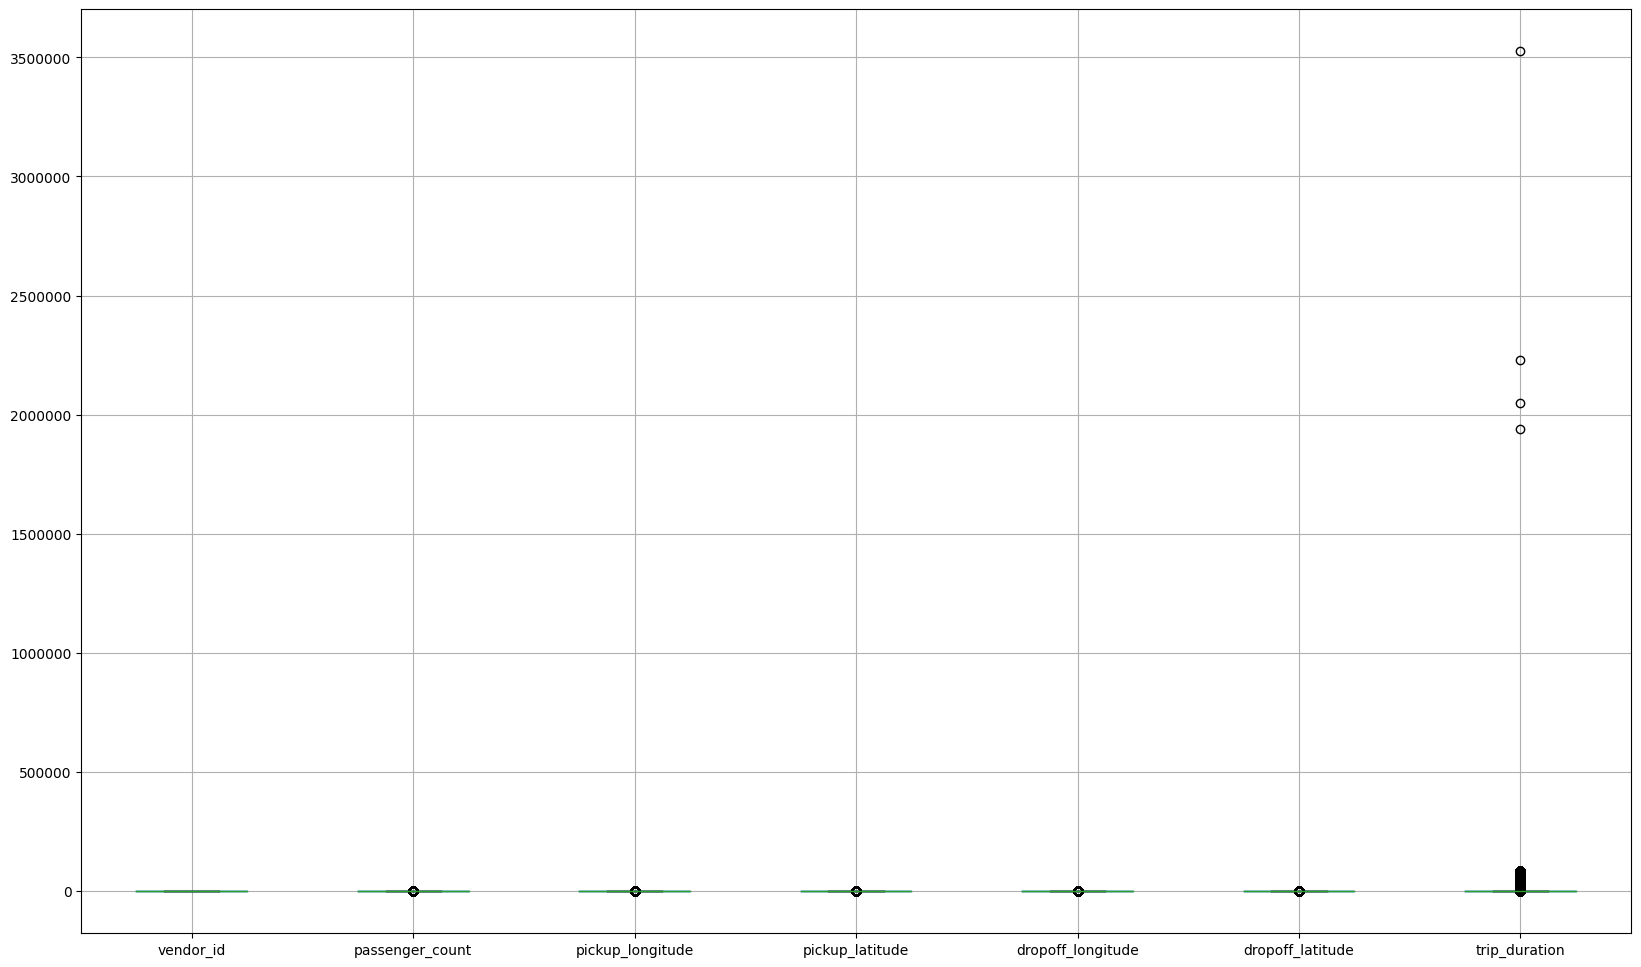

In [6]:
plt.figure(figsize=(20,12))
plt.ticklabel_format(axis = 'y', useOffset=False, style='plain')
train.boxplot()

<AxesSubplot: >

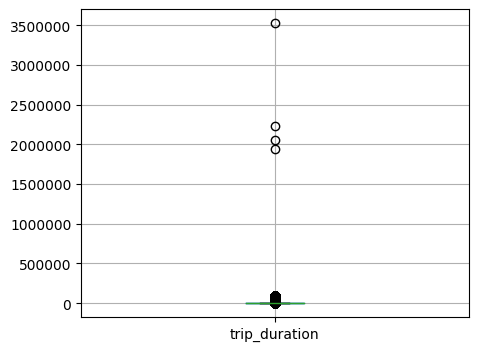

In [7]:
plt.figure(figsize=(5,4))
plt.ticklabel_format(axis = 'y', useOffset=False, style='plain')
train.boxplot(column="trip_duration", return_type = 'axes')

In [8]:
train = train[(train.trip_duration < 1500000)]

<AxesSubplot: >

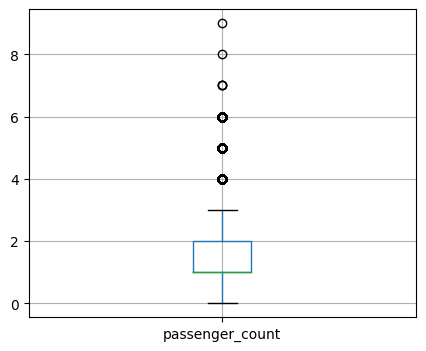

In [9]:
plt.figure(figsize=(5,4))
plt.ticklabel_format(axis = 'y', useOffset=False, style='plain')
train.boxplot(column="passenger_count", return_type = 'axes')

In [10]:
train = train[(train.passenger_count > 0)]

In [11]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458580.00000,1458580.00000,1458580.00000,1458580.00000,1458580.00000,1458580.00000,1458580.00000
mean,1.53495,1.66460,-73.97349,40.75092,-73.97342,40.75180,952.78376
std,0.49878,1.31423,0.07090,0.03288,0.07064,0.03589,3170.60179
min,1.00000,1.00000,-121.93334,34.35970,-121.93330,32.18114,1.00000
25%,1.00000,1.00000,-73.99187,40.73735,-73.99133,40.73589,397.00000
50%,2.00000,1.00000,-73.98174,40.75410,-73.97975,40.75452,662.00000
75%,2.00000,2.00000,-73.96733,40.76836,-73.96302,40.76981,1075.00000
max,2.00000,9.00000,-61.33553,51.88108,-61.33553,43.92103,86392.00000


In [12]:
train = train[(train.pickup_longitude > -90)]
train = train[(train.pickup_latitude < 50)]
train = train[(train.dropoff_longitude > -120)]

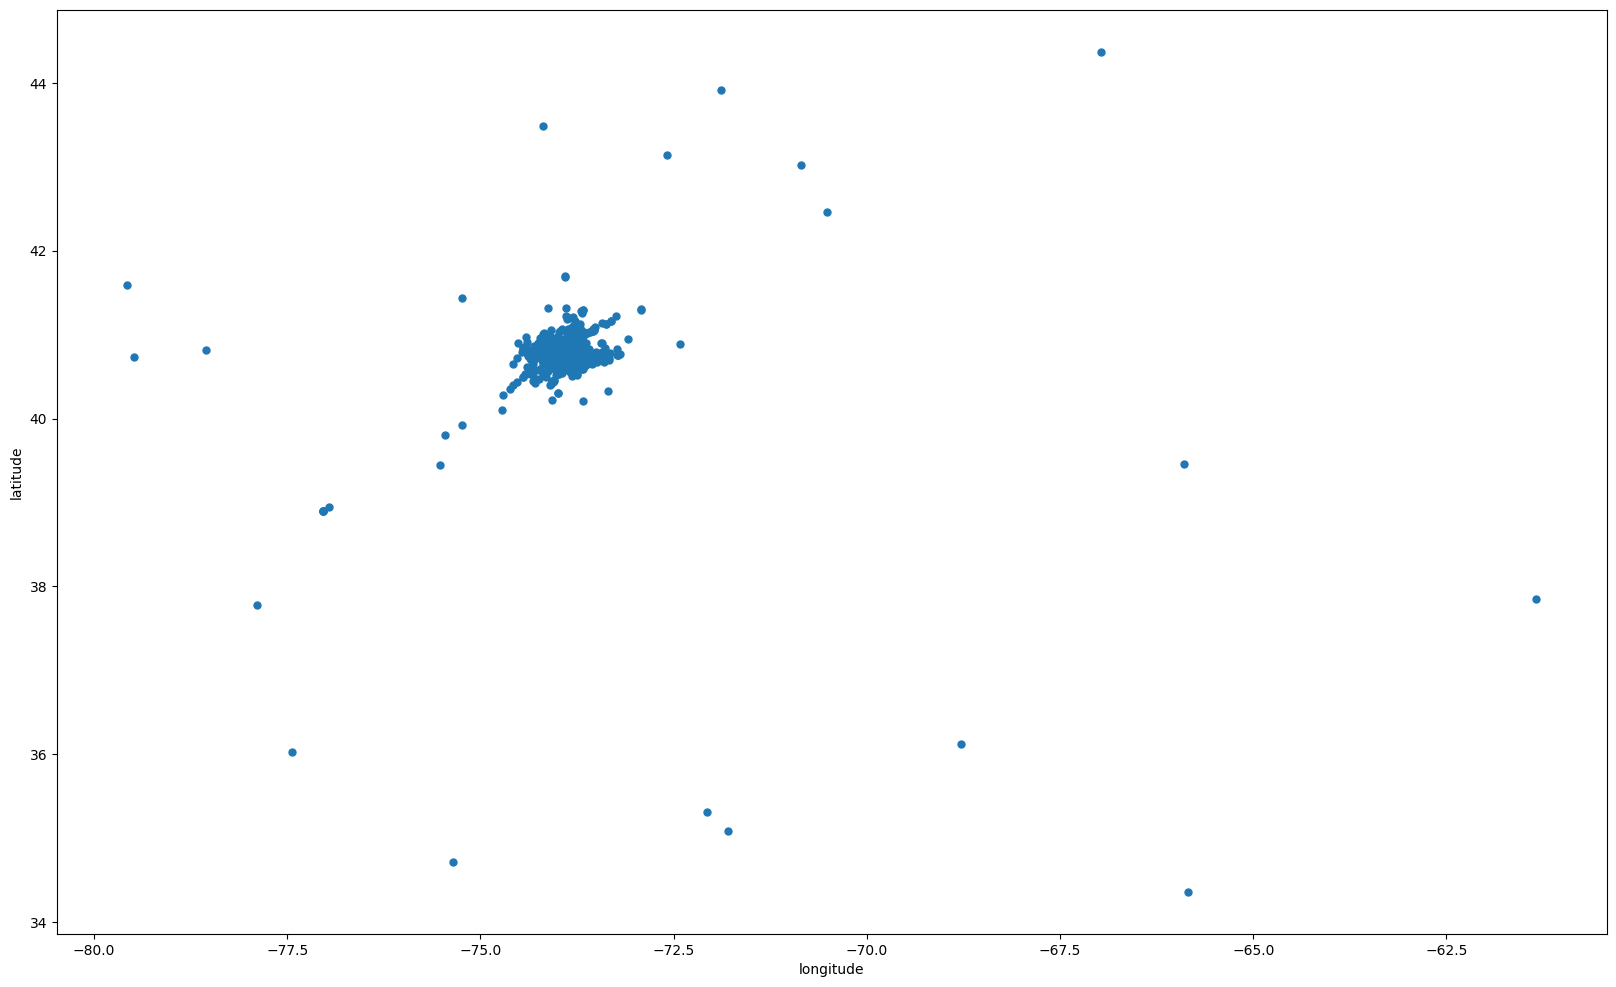

In [13]:
pickup_ln = list(train.pickup_longitude) #탑승한 위치
pickup_la = list(train.pickup_latitude)
plt.figure(figsize=(20,12))
plt.plot(pickup_ln, pickup_la, '.', alpha = 1, markersize = 10)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

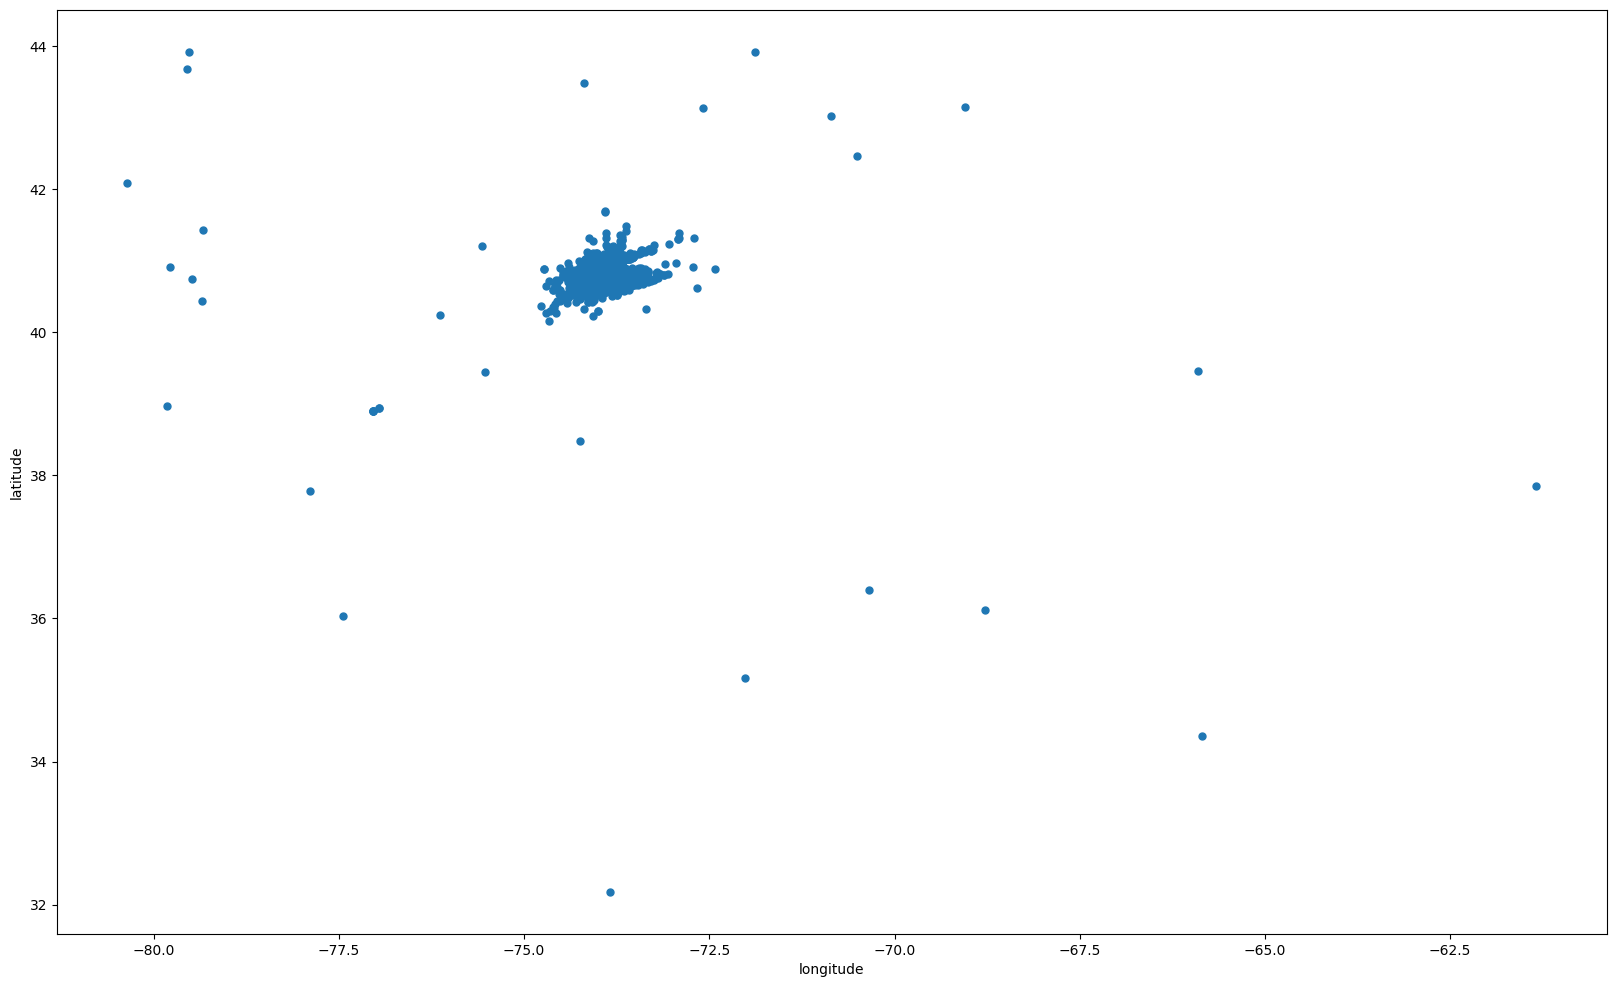

In [14]:
dropoff_ln = list(train.dropoff_longitude) # 내린 위치
dropoff_la = list(train.dropoff_latitude)
plt.figure(figsize=(20,12))
plt.plot(dropoff_ln, dropoff_la, '.', alpha = 1, markersize = 10)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

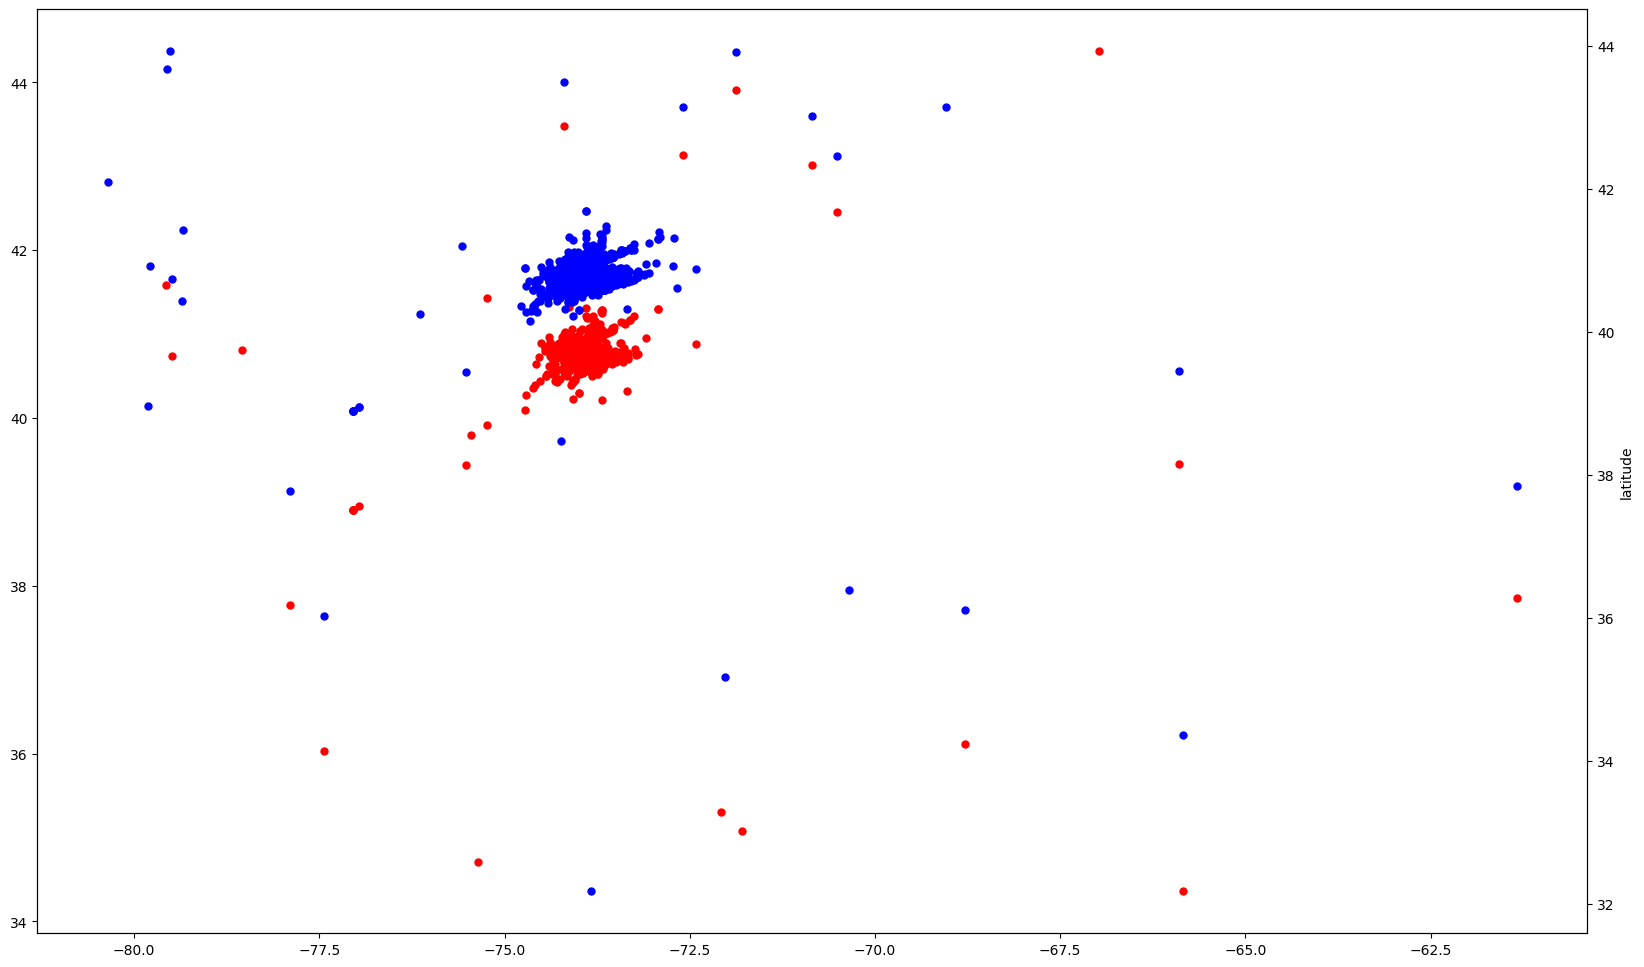

In [15]:
plt.figure(figsize=(20,12))

ax1 = plt.subplot()
ax1.plot(pickup_ln, pickup_la, '.', alpha = 1, markersize = 10, color = 'red') #탑승한 위치

ax2 = plt.twinx()
ax2.plot(dropoff_ln, dropoff_la, '.', alpha = 1, markersize = 10, color = 'blue') #내린 위치

plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

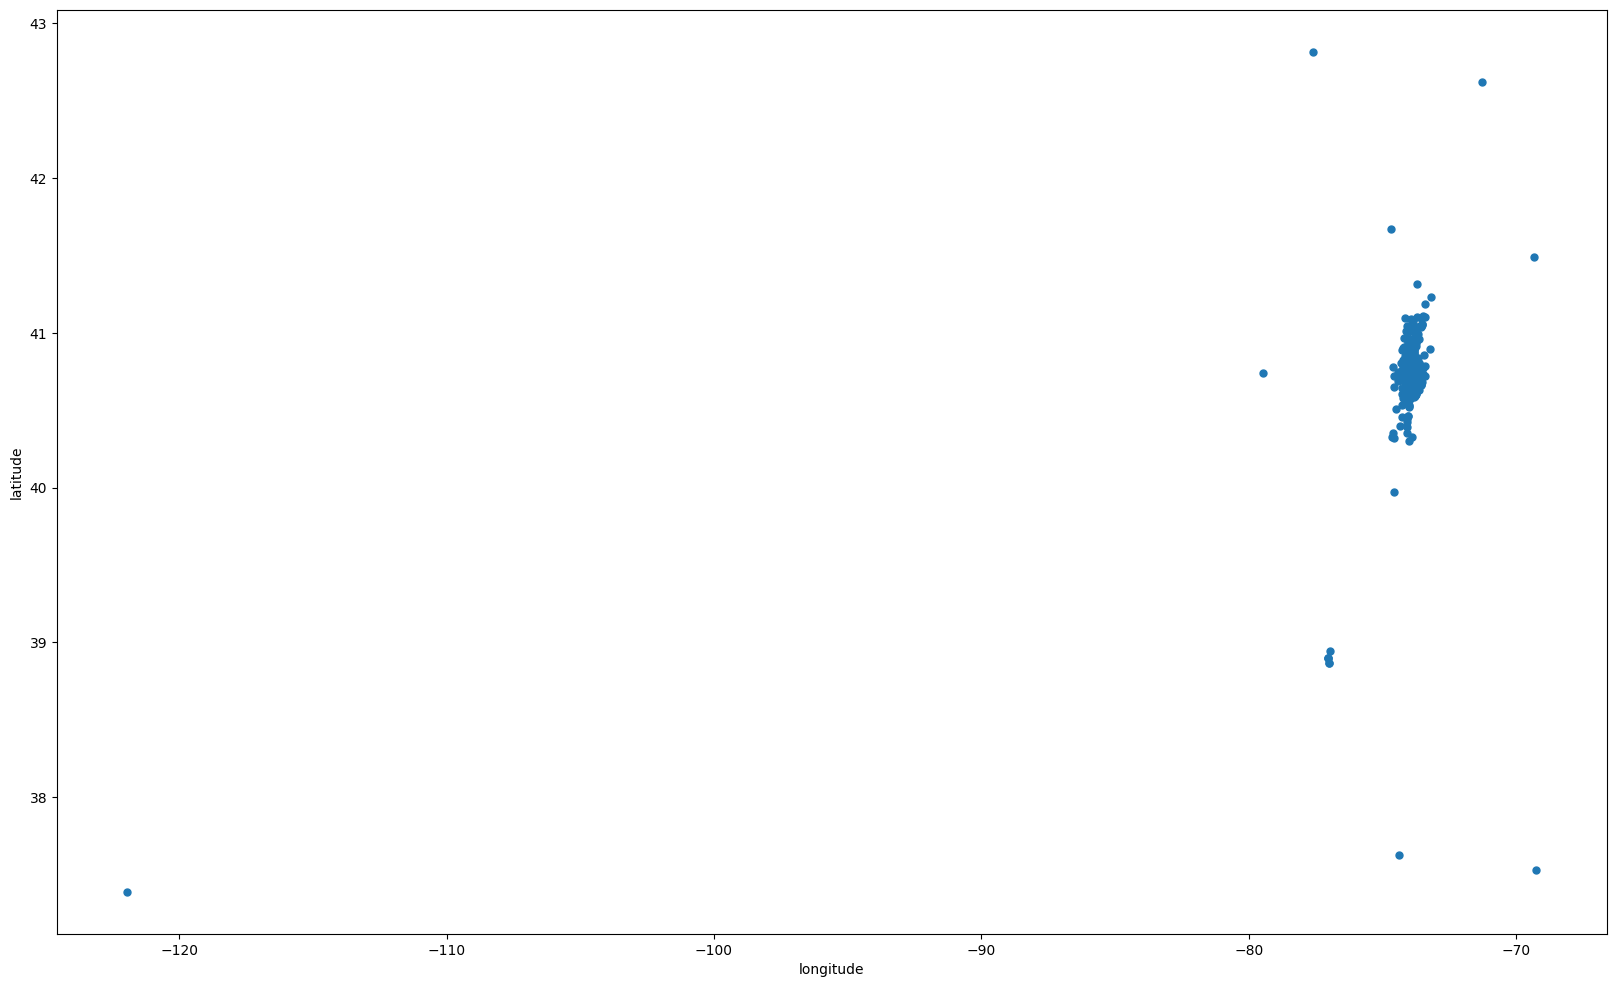

In [16]:
pickup_ln = list(test.pickup_longitude) #탑승한 위치
pickup_la = list(test.pickup_latitude)
plt.figure(figsize=(20,12))
plt.plot(pickup_ln, pickup_la, '.', alpha = 1, markersize = 10)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

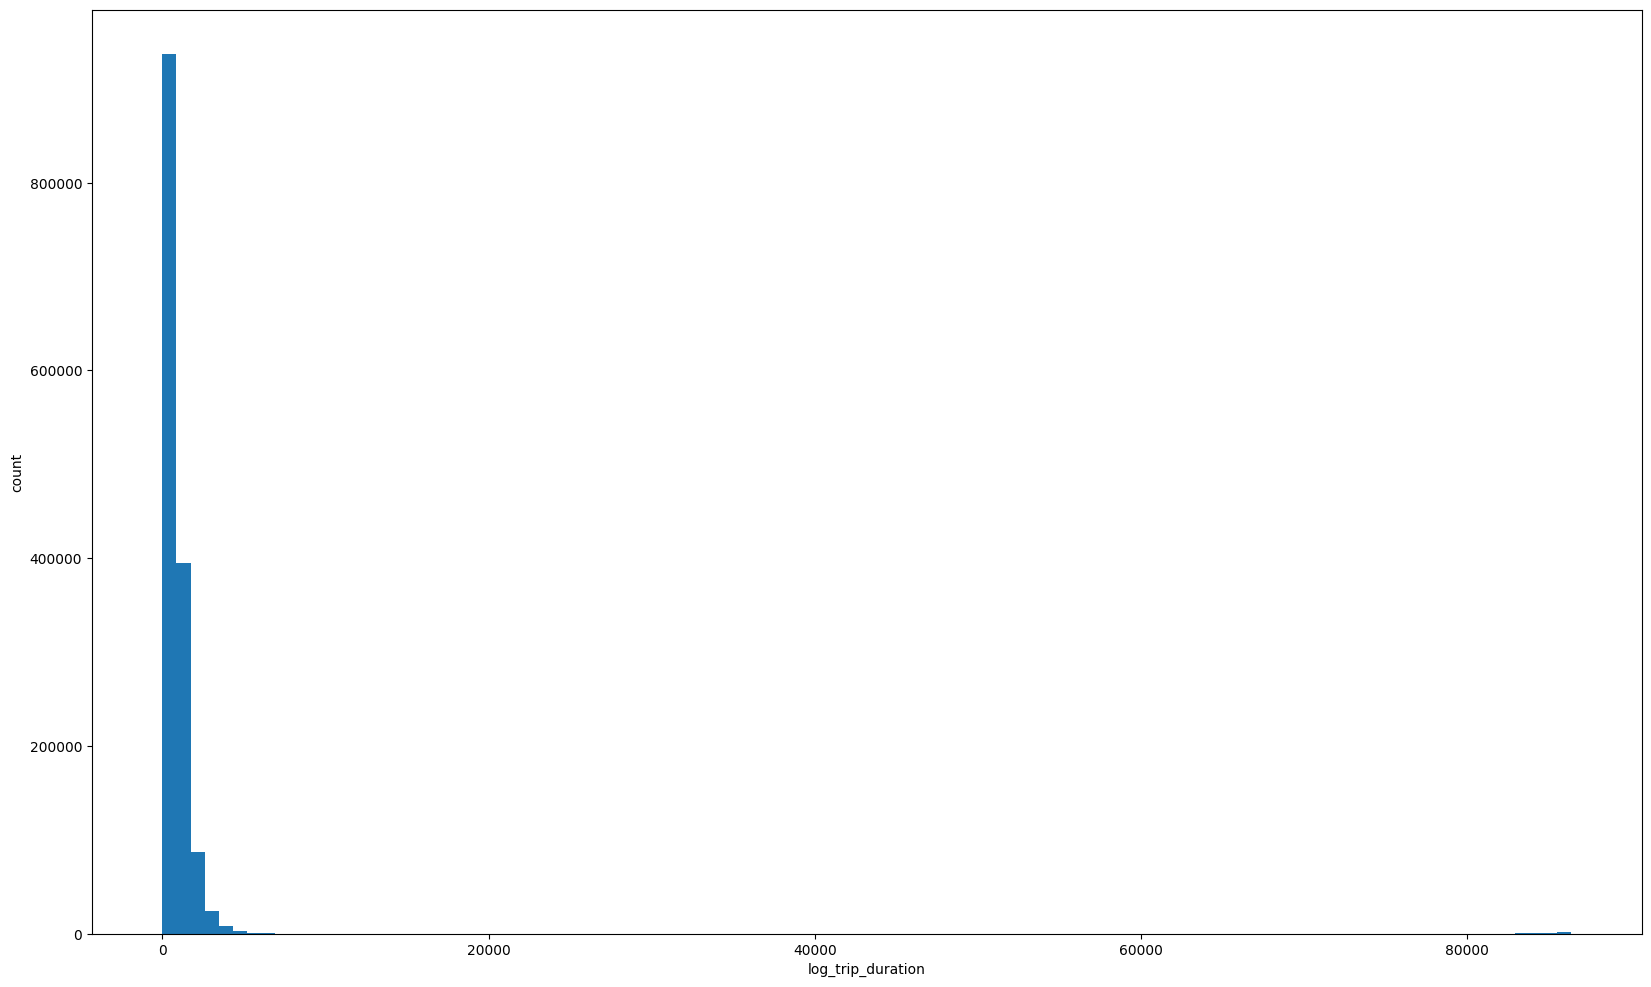

In [17]:
plt.figure(figsize=(20,12))
train['trip_duration'] = train['trip_duration'].values
plt.hist(train['trip_duration'].values, bins = 100)
plt.xlabel('log_trip_duration')
plt.ylabel('count')
plt.show()

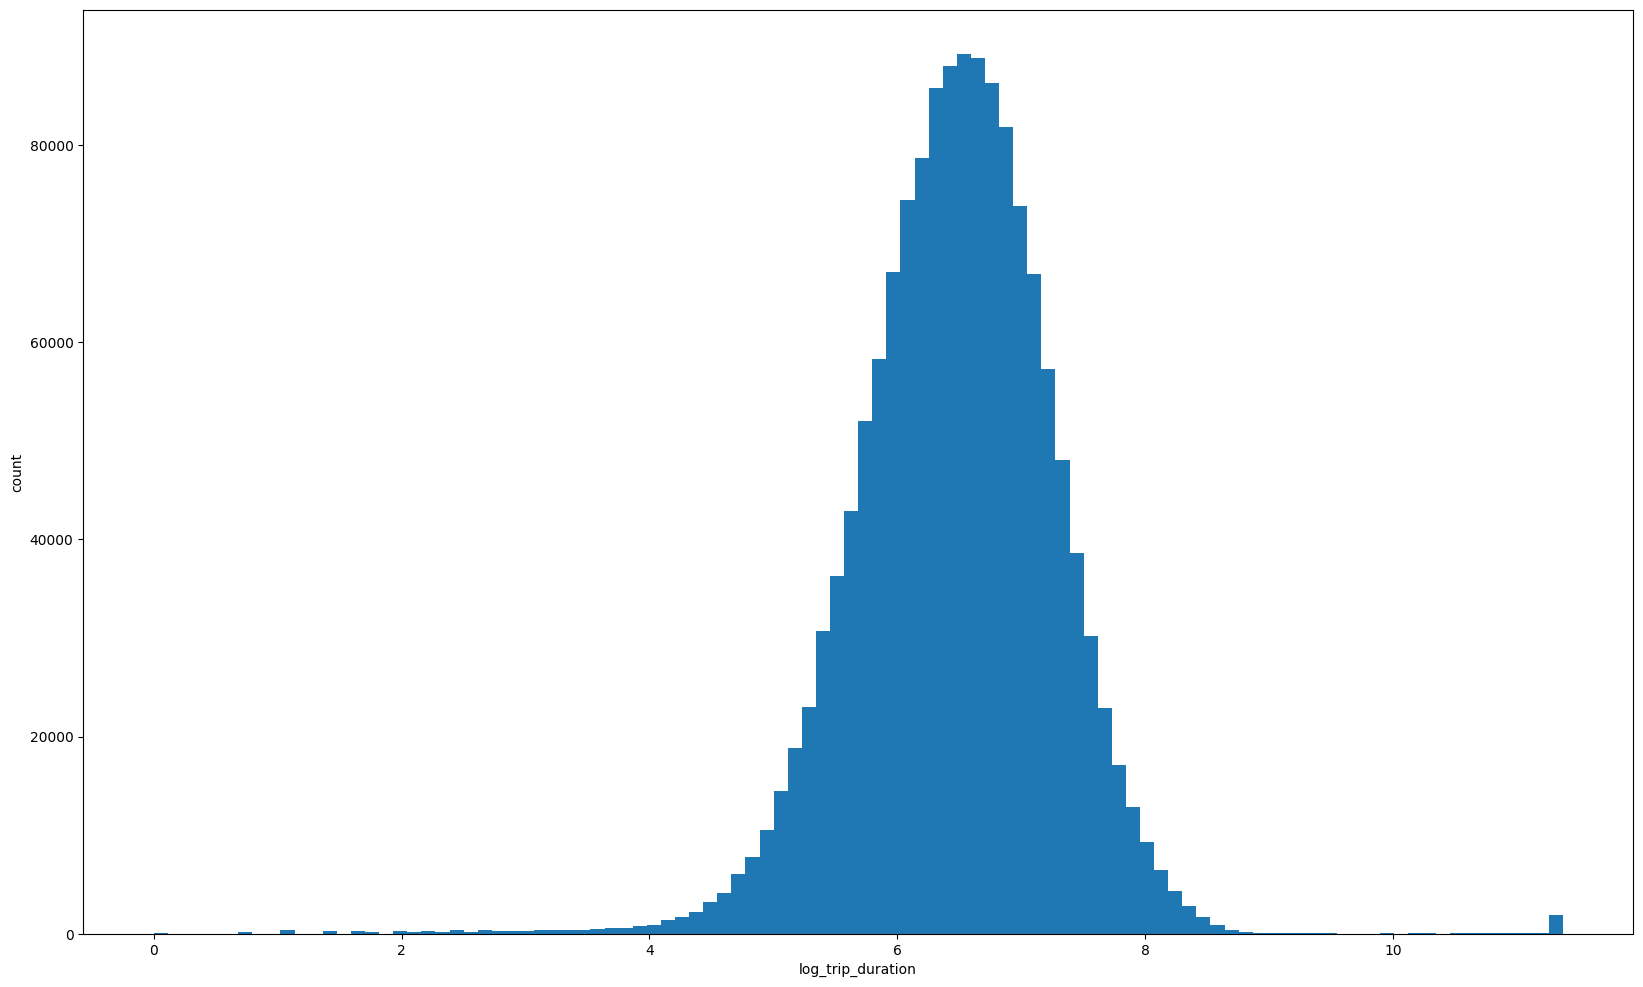

In [18]:
plt.figure(figsize=(20,12))
train['trip_duration'] = np.log(train['trip_duration'].values) # log 적용을 통한 정규분포화
plt.hist(train['trip_duration'].values, bins = 100)
plt.xlabel('log_trip_duration')
plt.ylabel('count')
plt.show()

In [19]:
train = train[(train.trip_duration < 9)]

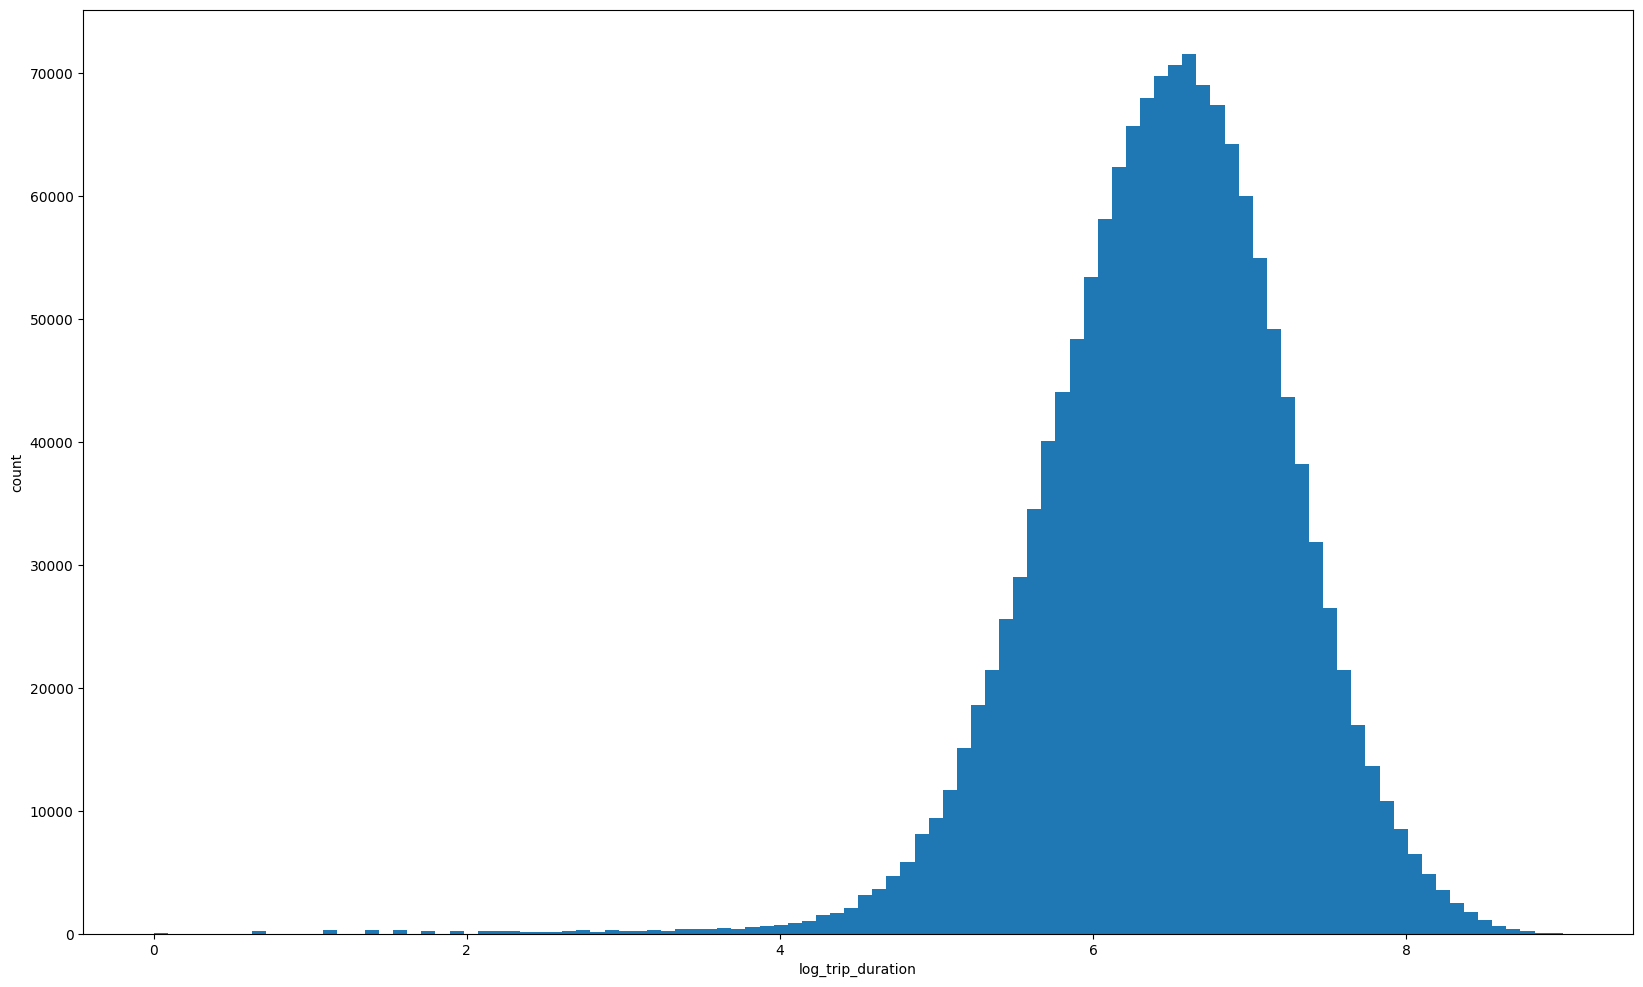

In [22]:
#feature engineering
plt.figure(figsize=(20,12))
plt.hist(train['trip_duration'].values, bins = 100)
plt.xlabel('log_trip_duration')
plt.ylabel('count')
plt.show()

In [46]:
train['year'] = train["pickup_datetime"].dt.year
train['month'] = train["pickup_datetime"].dt.month
train['day'] = train["pickup_datetime"].dt.day
train['hour'] = train["pickup_datetime"].dt.hour
train['minute'] = train["pickup_datetime"].dt.minute
train['second'] = train["pickup_datetime"].dt.second
train['weekday'] = train["pickup_datetime"].dt.weekday
train['minute_of_day'] = train['hour'] * 60 + train['minute']
train = train.drop(['minute'] , axis=1)

import holidays
usa_holidays = holidays.USA()
def depend_holiday(df) :
    date = str(df['pickup_datetime'])[0:10]
    if (date in usa_holidays) : return 1
    else : return 0
train['holidays']= train.apply(depend_holiday, axis=1)
train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,year,month,day,hour,second,minute_of_day,weekday,holidays
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98215,40.76794,-73.96463,40.76560,N,6.12030,2016,3,14,17,55,1044,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98042,40.73856,-73.99948,40.73115,N,6.49677,2016,6,12,0,35,43,6,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.97903,40.76394,-74.00533,40.71009,N,7.66106,2016,1,19,11,24,695,1,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01004,40.71997,-74.01227,40.70672,N,6.06146,2016,4,6,19,31,1172,2,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97305,40.79321,-73.97292,40.78252,N,6.07535,2016,3,26,13,55,810,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.98220,40.74552,-73.99491,40.74017,N,6.65673,2016,4,8,13,4,811,4,0
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.00095,40.74738,-73.97018,40.79655,N,6.48464,2016,1,10,7,15,455,6,0
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.95913,40.76880,-74.00443,40.70737,N,6.63857,2016,4,22,6,41,417,4,0
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.98208,40.74906,-73.97463,40.75711,N,5.92158,2016,1,5,15,26,956,1,0


In [47]:
test['year'] = test["pickup_datetime"].dt.year
test['month'] = test["pickup_datetime"].dt.month
test['day'] = test["pickup_datetime"].dt.day
test['hour'] = test["pickup_datetime"].dt.hour
test['minute'] = test["pickup_datetime"].dt.minute
test['second'] = test["pickup_datetime"].dt.second
test['weekday'] = test["pickup_datetime"].dt.weekday
test['minute_of_day'] = test['hour'] * 60 + test['minute']
test = test.drop(['minute'] , axis=1)
test['holidays'] = test.apply(depend_holiday, axis=1)
test

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,year,month,day,hour,second,minute_of_day,weekday,holidays
0,id3004672,1,2016-06-30 23:59:58,1,-73.98813,40.73203,-73.99017,40.75668,N,2016,6,30,23,58,1439,3,0
1,id3505355,1,2016-06-30 23:59:53,1,-73.96420,40.67999,-73.95981,40.65540,N,2016,6,30,23,53,1439,3,0
2,id1217141,1,2016-06-30 23:59:47,1,-73.99744,40.73758,-73.98616,40.72952,N,2016,6,30,23,47,1439,3,0
3,id2150126,2,2016-06-30 23:59:41,1,-73.95607,40.77190,-73.98643,40.73047,N,2016,6,30,23,41,1439,3,0
4,id1598245,1,2016-06-30 23:59:33,1,-73.97021,40.76147,-73.96151,40.75589,N,2016,6,30,23,33,1439,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625129,id3008929,1,2016-01-01 00:02:52,1,-74.00346,40.72511,-74.00125,40.73364,N,2016,1,1,0,52,2,4,1
625130,id3700764,1,2016-01-01 00:01:52,1,-74.00636,40.74378,-73.95341,40.78247,N,2016,1,1,0,52,1,4,1
625131,id2568735,1,2016-01-01 00:01:24,2,-73.97227,40.75986,-73.87660,40.74866,N,2016,1,1,0,24,1,4,1
625132,id1384355,1,2016-01-01 00:00:28,1,-73.97650,40.73356,-73.85426,40.89179,N,2016,1,1,0,28,0,4,1


In [48]:
train['store_and_fwd_flag'] = train['store_and_fwd_flag'].map({'Y':1, 'N':0})
test['store_and_fwd_flag'] = test['store_and_fwd_flag'].map({'Y':1, 'N':0})

In [49]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,year,month,day,hour,second,minute_of_day,weekday,holidays
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98215,40.76794,-73.96463,40.76560,0,6.12030,2016,3,14,17,55,1044,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98042,40.73856,-73.99948,40.73115,0,6.49677,2016,6,12,0,35,43,6,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.97903,40.76394,-74.00533,40.71009,0,7.66106,2016,1,19,11,24,695,1,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01004,40.71997,-74.01227,40.70672,0,6.06146,2016,4,6,19,31,1172,2,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97305,40.79321,-73.97292,40.78252,0,6.07535,2016,3,26,13,55,810,5,0


In [50]:
def haversine(lat1, lng1, lat2, lng2) : 
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    EARTH_RADIUS = 6731
    lat = lat2 - lat1
    lng = lng2 -lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5)**2 # 곡률 반영
    dis = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d)) #거리 재는 수식
    return dis

In [51]:
train['distance'] = haversine(train['pickup_latitude'], train['pickup_longitude'], train['dropoff_latitude'], train['dropoff_longitude'])
test['distance'] = haversine(test['pickup_latitude'], test['pickup_longitude'], test['dropoff_latitude'], test['dropoff_longitude'])

In [52]:
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,year,month,day,hour,second,minute_of_day,weekday,holidays,distance
0,id3004672,1,2016-06-30 23:59:58,1,-73.98813,40.73203,-73.99017,40.75668,0,2016,6,30,23,58,1439,3,0,2.90162
1,id3505355,1,2016-06-30 23:59:53,1,-73.96420,40.67999,-73.95981,40.65540,0,2016,6,30,23,53,1439,3,0,2.91515
2,id1217141,1,2016-06-30 23:59:47,1,-73.99744,40.73758,-73.98616,40.72952,0,2016,6,30,23,47,1439,3,0,1.37996
3,id2150126,2,2016-06-30 23:59:41,1,-73.95607,40.77190,-73.98643,40.73047,0,2016,6,30,23,41,1439,3,0,5.56682
4,id1598245,1,2016-06-30 23:59:33,1,-73.97021,40.76147,-73.96151,40.75589,0,2016,6,30,23,33,1439,3,0,1.01514


In [53]:
def degree(lat1, lng1, lat2, lng2) :
    lat1, lng1, lat1, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng2 - lng1) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng2 - lng1)
    return np.degrees(np.arctan2(y , x))

In [54]:
train['direction'] = degree(train['pickup_latitude'], train['pickup_longitude'], train['dropoff_latitude'], train['dropoff_longitude'])
test['direction'] = degree(test['pickup_latitude'], test['pickup_longitude'], test['dropoff_latitude'], test['dropoff_longitude'])

In [55]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,year,month,day,hour,second,minute_of_day,weekday,holidays,distance,direction
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98215,40.76794,-73.96463,40.76560,0,...,2016,3,14,17,55,1044,0,0,1.58320,-0.02468
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98042,40.73856,-73.99948,40.73115,0,...,2016,6,12,0,35,43,6,0,1.90753,0.02591
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.97903,40.76394,-74.00533,40.71009,0,...,2016,1,19,11,24,695,1,0,6.74590,0.03499
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01004,40.71997,-74.01227,40.70672,0,...,2016,4,6,19,31,1172,2,0,1.56944,0.00295
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97305,40.79321,-73.97292,40.78252,0,...,2016,3,26,13,55,810,5,0,1.25575,-0.00019


<AxesSubplot: >

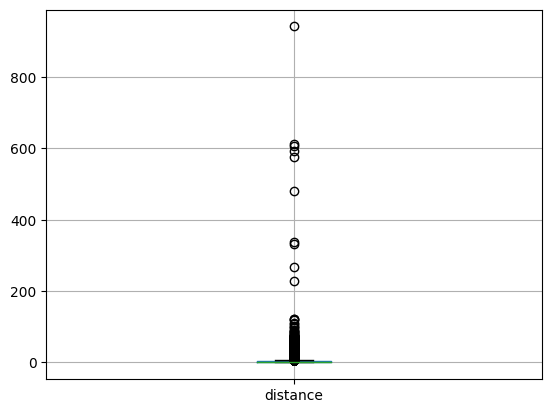

In [58]:
train.boxplot(column='distance')


In [64]:
train = train[train['distance'] < 200]

<AxesSubplot: >

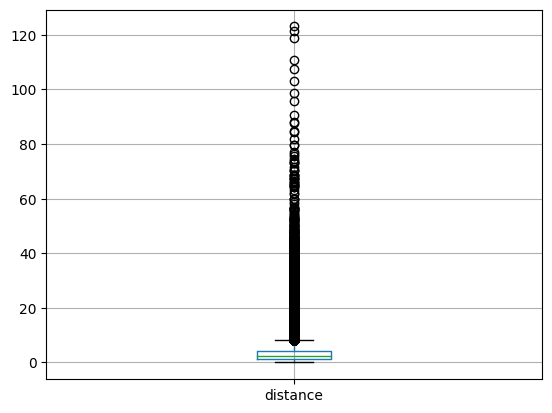

In [65]:
train.boxplot(column='distance')

In [66]:
x_train = train.drop(['id', 'pickup_datetime', 'dropoff_datetime', 'trip_duration'], axis=1)
x_test = test.drop(['id', 'pickup_datetime'], axis=1)

In [70]:
corr_train =  train.drop(['id', 'pickup_datetime', 'dropoff_datetime'], axis=1)

<AxesSubplot: >

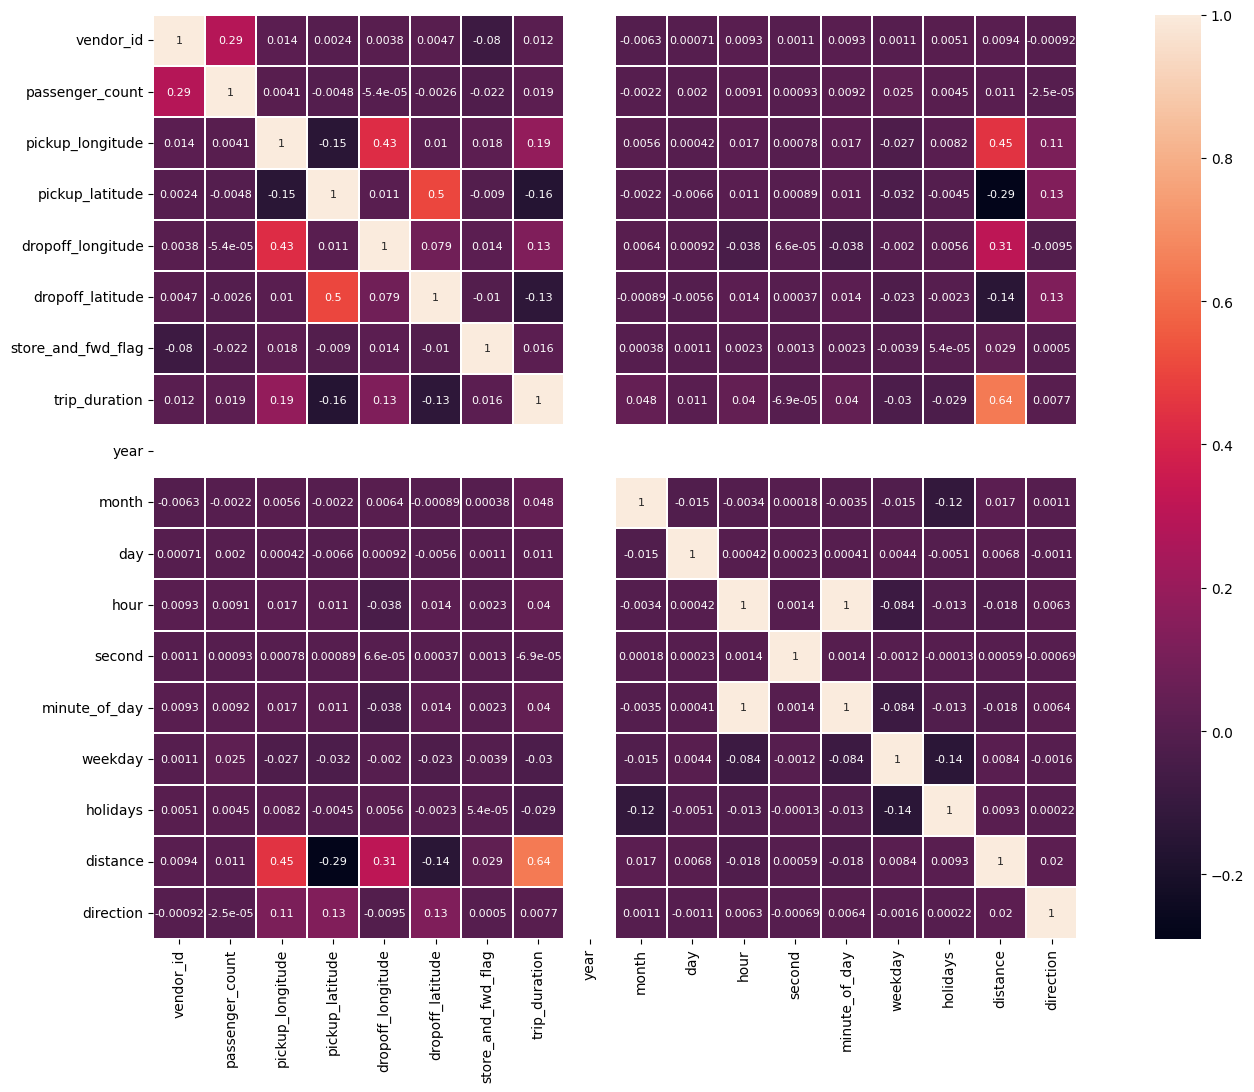

In [75]:
plt.figure(figsize=(20,12))
sns.heatmap(corr_train.corr(), linewidths=0.1, vmax= 1.0, square=True, annot=True, annot_kws= {'size' : 8})

In [67]:
y_train = train['trip_duration'] #이미 위에서 로그 처리 됨

In [68]:
display(x_train.head(), x_test.head())

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,year,month,day,hour,second,minute_of_day,weekday,holidays,distance,direction
0,2,1,-73.98215,40.76794,-73.96463,40.76560,0,2016,3,14,17,55,1044,0,0,1.58320,-0.02468
1,1,1,-73.98042,40.73856,-73.99948,40.73115,0,2016,6,12,0,35,43,6,0,1.90753,0.02591
2,2,1,-73.97903,40.76394,-74.00533,40.71009,0,2016,1,19,11,24,695,1,0,6.74590,0.03499
3,2,1,-74.01004,40.71997,-74.01227,40.70672,0,2016,4,6,19,31,1172,2,0,1.56944,0.00295
4,2,1,-73.97305,40.79321,-73.97292,40.78252,0,2016,3,26,13,55,810,5,0,1.25575,-0.00019


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,year,month,day,hour,second,minute_of_day,weekday,holidays,distance,direction
0,1,1,-73.98813,40.73203,-73.99017,40.75668,0,2016,6,30,23,58,1439,3,0,2.90162,0.00285
1,1,1,-73.96420,40.67999,-73.95981,40.65540,0,2016,6,30,23,53,1439,3,0,2.91515,-0.00554
2,1,1,-73.99744,40.73758,-73.98616,40.72952,0,2016,6,30,23,47,1439,3,0,1.37996,-0.01530
3,2,1,-73.95607,40.77190,-73.98643,40.73047,0,2016,6,30,23,41,1439,3,0,5.56682,0.04123
4,1,1,-73.97021,40.76147,-73.96151,40.75589,0,2016,6,30,23,33,1439,3,0,1.01514,-0.01214


In [78]:
#modeling
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, n_jobs=-1)
model.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [79]:
result = model.predict(x_test)
result

array([6.64680195, 6.39402922, 6.01677243, ..., 7.34192741, 7.56805665,
       7.01395132])

In [83]:
sub = pd.read_csv("data/sample_submission.csv")
sub["trip_duration"] = np.exp(result)
sub

,id,trip_duration
0,id3004672,770.31687
1,id3505355,598.26226
2,id1217141,410.25234
3,id2150126,1396.56861
4,id1598245,347.08062
...,...,...
625129,id3008929,257.69496
625130,id3700764,1202.21734
625131,id2568735,1543.68456
625132,id1384355,1935.37550


In [85]:
sub.to_csv("data/sub.csv", index=False) #결과를 sub.csv파일을 생성하여 저장